<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None
(4746, 12)


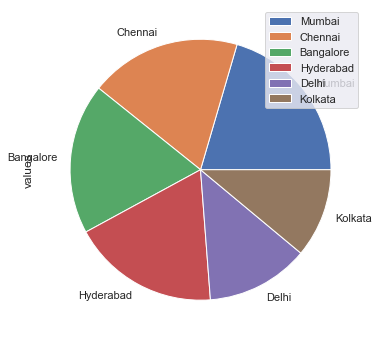

In [86]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
import seaborn as sns

sns.set(style="darkgrid")

warnings.filterwarnings('ignore')


all_data = pd.read_csv('House_Rent_Dataset.csv')

# Data info
print(all_data.info())

# Data shape
print(all_data.shape)

city_count = all_data['City'].value_counts()
df_city = pd.DataFrame({'labels': city_count.index, 'values': city_count.values}, index=city_count.index)
df_city
plot = df_city.plot.pie(y='values', figsize=(6,6))


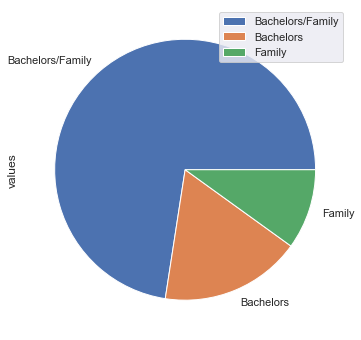

In [87]:
tenant_count = all_data['Tenant Preferred'].value_counts()
df_tenant = pd.DataFrame({'labels': tenant_count.index,'values': tenant_count.values}, index=tenant_count.index)
df_tenant
tenant_plot = df_tenant.plot.pie(y='values', figsize=(6,6))

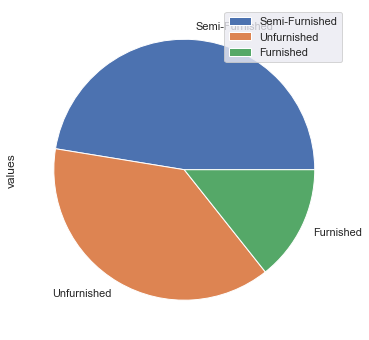

In [88]:
furnishing_count = all_data['Furnishing Status'].value_counts()
df_f = pd.DataFrame({'labels': furnishing_count.index,'values': furnishing_count.values}, index=furnishing_count.index)
df_f
furnishing_plot = df_f.plot.pie(y='values', figsize=(6,6))

In [89]:
# Data cleaning

In [90]:
print(all_data.isnull().values.any())
print(all_data.isnull().values)
print(all_data.isnull().any().any())

False
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
False


In [91]:
# 
all_data['Posted On'] = pd.to_datetime(all_data["Posted On"])
all_data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [92]:
def one_hot_encoding(df,col):
    oneH = pd.get_dummies(df[col])
    df = df.drop(col,axis = 1)
    df = df.join(oneH, lsuffix='_l')
    return df

In [93]:
columns = ['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']
for col in columns:
    all_data = one_hot_encoding(all_data, col)


In [94]:
all_data = all_data.join(all_data['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Floor Max'}))
all_data['Floor Level'] = all_data.apply(lambda x: 0 if x['Floor Level'] =='Ground' \
                               else ( -1 if x['Floor Level'] =='Lower Basement' else (x['Floor Max']) ) , axis=1)

In [95]:
all_data = all_data.dropna()
all_data['Floor Level'] = all_data['Floor Level'].astype(int)
all_data['Floor Max'] = all_data['Floor Max'].astype(int)

In [96]:
# DATA VALUES 
all_data['month posted'] = all_data['Posted On'].dt.month
all_data['day posted'] = all_data['Posted On'].dt.day
all_data['day of week posted'] = all_data['Posted On'].dt.day_of_week
all_data['quarter poster'] = all_data['Posted On'].dt.quarter
all_data

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Built Area,Carpet Area,Super Area,...,Family,Contact Agent,Contact Builder,Contact Owner,Floor Level,Floor Max,month posted,day posted,day of week posted,quarter poster
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,0,0,1,...,0,0,0,1,0,2,5,18,2,2
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,0,0,1,...,0,0,0,1,3,3,5,13,4,2
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,0,0,1,...,0,0,0,1,3,3,5,16,0,2
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,0,0,1,...,0,0,0,1,2,2,7,4,0,3
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,0,1,0,...,0,0,0,1,2,2,5,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Bandam Kommu,2,0,1,0,...,0,0,0,1,5,5,5,18,2,2
4742,2022-05-15,3,29000,2000,1 out of 4,"Manikonda, Hyderabad",3,0,0,1,...,0,0,0,1,4,4,5,15,6,2
4743,2022-07-10,3,35000,1750,3 out of 5,"Himayath Nagar, NH 7",3,0,1,0,...,0,1,0,0,5,5,7,10,6,3
4744,2022-07-06,3,45000,1500,23 out of 34,Gachibowli,2,0,1,0,...,1,1,0,0,34,34,7,6,2,3


In [97]:
all_data = all_data.drop(['Floor','Posted On','Area Locality'], axis=1)
all_data = all_data.dropna()

In [98]:
# DUPLICATES

print(all_data.duplicated().sum())
all_data = all_data.drop_duplicates()

16


In [99]:
all_data

,BHK,Rent,Size,Bathroom,Built Area,Carpet Area,Super Area,Bangalore,Chennai,Delhi,...,Family,Contact Agent,Contact Builder,Contact Owner,Floor Level,Floor Max,month posted,day posted,day of week posted,quarter poster
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,2,5,18,2,2
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,0,1,3,3,5,13,4,2
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,0,1,3,3,5,16,0,2
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,2,2,7,4,0,3
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,2,2,5,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,0,1,0,0,0,0,...,0,0,0,1,5,5,5,18,2,2
4742,3,29000,2000,3,0,0,1,0,0,0,...,0,0,0,1,4,4,5,15,6,2
4743,3,35000,1750,3,0,1,0,0,0,0,...,0,1,0,0,5,5,7,10,6,3
4744,3,45000,1500,2,0,1,0,0,0,0,...,1,1,0,0,34,34,7,6,2,3


<AxesSubplot:>

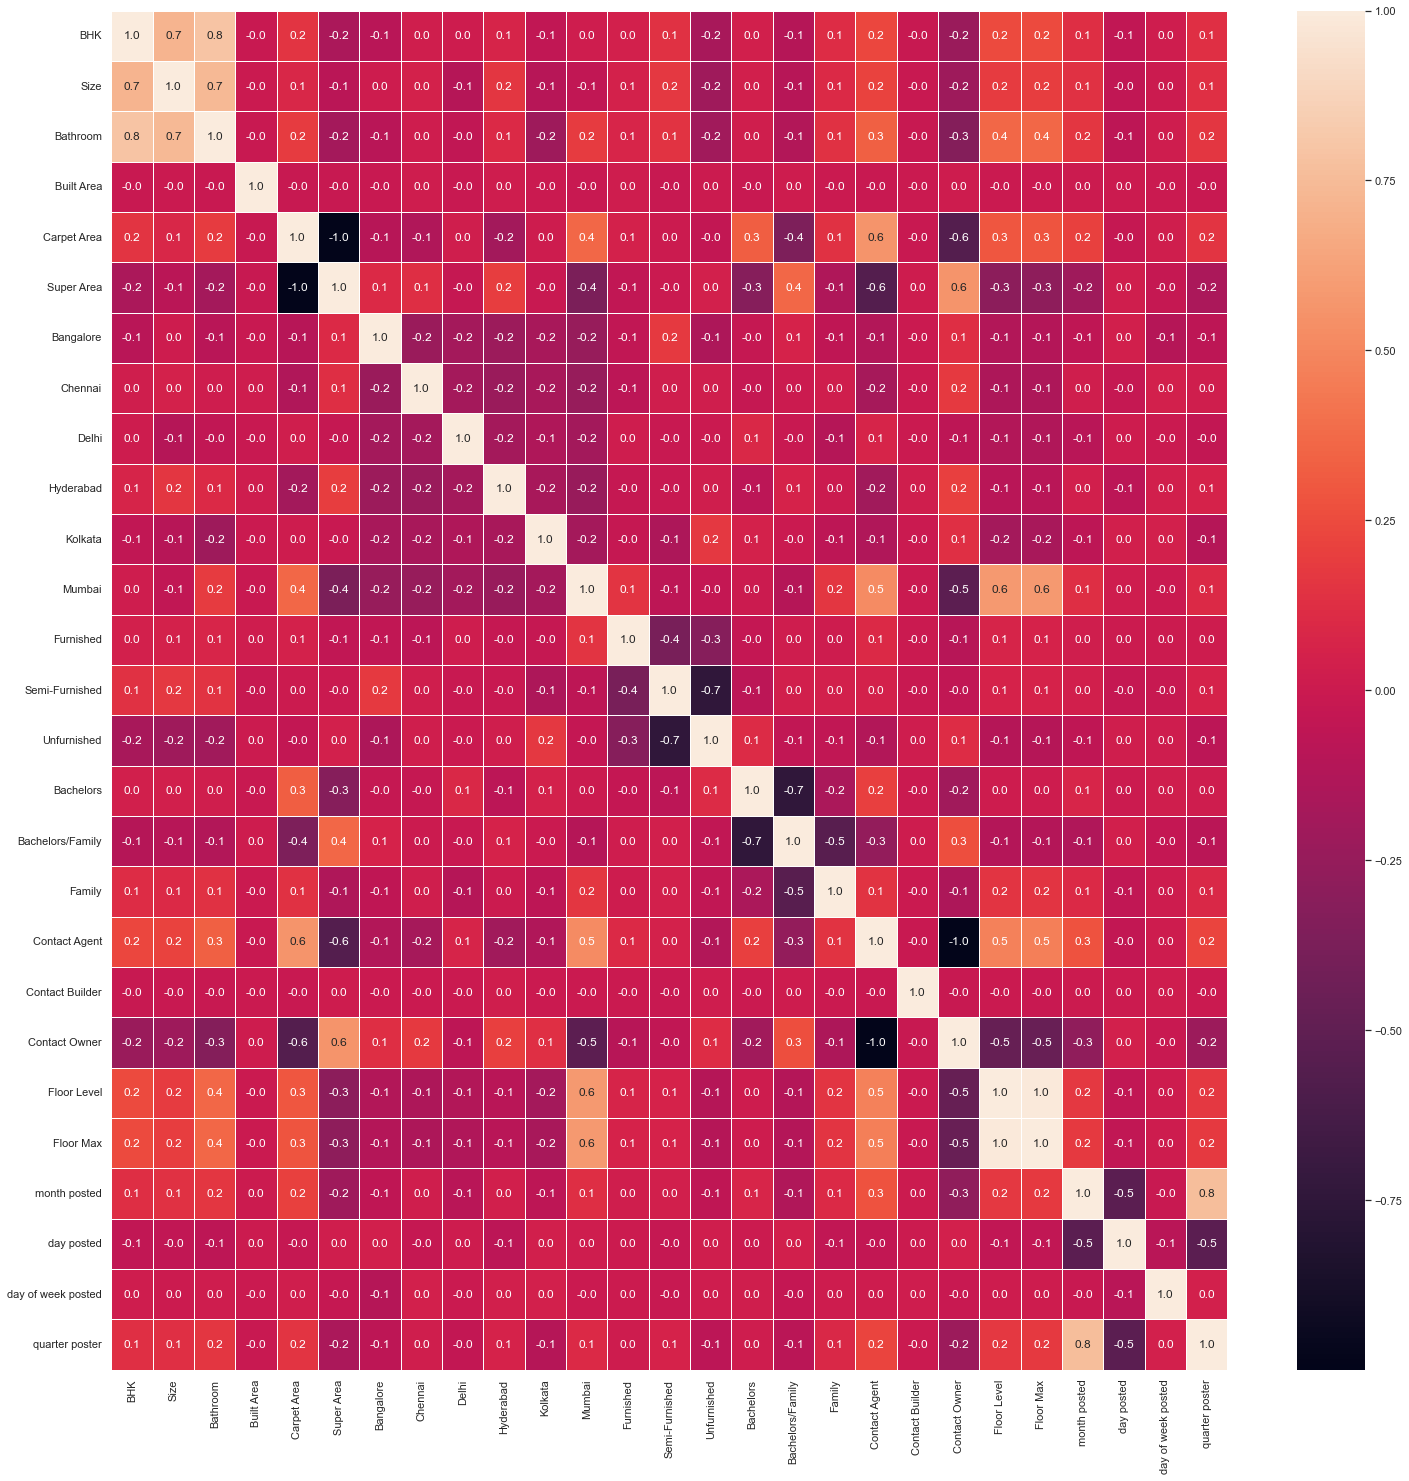

In [100]:
# check correlation
data_num = all_data.drop('Rent', axis=1)
corr = data_num.corr()

#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [101]:
all_data['Rent'] = np.log1p(all_data['Rent'])

In [102]:
target = 'Rent'
X = all_data.loc[:,all_data.columns!=target]
y = all_data.loc[:,all_data.columns==target]

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

In [104]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3780, 27)
x_test shape:  (946, 27)
y_train shape:  (3780, 1)
y_test shape:  (946, 1)


In [105]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [106]:
# Random Forest function
from sklearn.ensemble import RandomForestRegressor

def rf(x_train, y_train, n_estimators=250):
 rndforest = RandomForestRegressor(n_estimators=250, n_jobs=-1)
 rndforest.fit(x_train, y_train)
 return rndforest

In [107]:
random_forest_en = rf(x_train,y_train.values.ravel(), n_estimators=250)

In [108]:
print("TRAINING ACCURACY:", random_forest_en.score(x_train, y_train))
print("VALIDATION ACCURACY", random_forest_en.score(x_test, y_test))

TRAINING ACCURACY: 0.9749411669244155
VALIDATION ACCURACY 0.81180421576253


In [109]:
predicctions = random_forest_en.predict(x_test)

In [110]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, predicctions, squared=False)
print(rms)

0.41320517019068714


In [111]:
from sklearn.metrics import r2_score
r2_score(predicctions, y_test)

0.7817000634678224

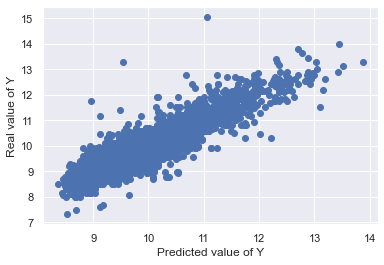

In [112]:
#build and train a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
plt.scatter(lr.predict(x_train), y_train)
plt.xlabel('Predicted value of Y')
plt.ylabel('Real value of Y')
plt.show()